<a href="https://colab.research.google.com/github/yaaili/test/blob/master/tf2.0code/05.tf_keras_%E5%BA%8F%E5%88%97%E9%97%AE%E9%A2%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 导入数据

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data = keras.datasets.imdb
(x_train,y_train),(x_test,y_test)= data.load_data(num_words=10000)

把文本训练成密集的向量
我们可以使用,我们发现这些评论的序列长短不一，为了便于后面神经网络的训练，我们需要对较长的序列进行截断，对就较短的序列进行填充。我们可以使用keras.preprocessing.sequence.pad_sequences方法对其进行填充。

In [0]:
print("截断前前5个样本序列长度:{}".format([len(x) for x in x_train[:5]]))
x_train = keras.preprocessing.sequence.pad_sequences(x_train,300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test,300)
print("截断后前5个样本序列长度:{}".format([len(x) for x in x_test[:5]]))

截断前前5个样本序列长度:[218, 189, 141, 550, 147]
截断后前5个样本序列长度:[300, 300, 300, 300, 300]


# 构建模型

In [0]:
model = keras.Sequential()
#输出为（None.300,50），意思是将这300个数据转化为300个50维的特征向量
model.add(layers.Embedding(10000,50,input_length=300))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation= "relu"))
y = model.add(layers.Dense(1,activation="sigmoid"))
model.summary()

model.compile(optimizer = keras.optimizers.Adam(lr=0.001),
             loss = "binary_crossentropy",
              metrics = ["acc"]
             )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1920128   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,420,257
Trainable params: 2,420,257
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
98/98 [==============================] - 3s 33ms/step - loss: 0.5086 - acc: 0.7221 - val_loss: 0.2980 - val_acc: 0.8746
Epoch 2/10
98/98 [==============================] - 3s 32ms/step - loss: 0.1643 - acc: 0.9394 - val_loss: 0.3016 - val_acc: 0.8769
Epoch 3/10
98/98 [==============================] - 3s 32ms/step - loss: 0.0391 - acc: 0.9924 - val_loss: 0.3552 - val_acc: 0.8732
Epoch 4/10
98/98 [==============================] - 3s 33ms/step - loss: 0.0079 - acc: 0.9995 - val_loss: 0.3952 - val_acc: 0.8736
Epoch 5/10
98/98 [==============================] - 3s 34ms/step - loss: 0.0027 - acc: 0.9999 - val_loss: 0.4250 - val_acc: 0.8734
Epoch 6/10
98/98 [==============================] - 3s 34ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4462 - val_acc: 0.8742
Epoch 7/10
98/98 [==============================] - 3s 32ms/step - loss: 8.4250e-04 - acc: 1.0000 - val_loss: 0.4639 - val_acc: 0.8747
Epoch 8/10
98/98 [==============================] - 3s 31ms/step - loss: 5.9368

In [0]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

代码分析

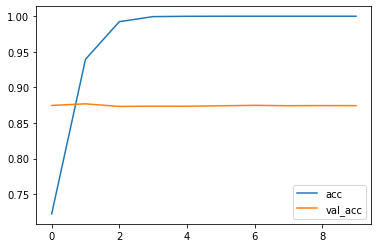

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history.get("acc"),label="acc")
plt.plot(history.epoch, history.history.get("val_acc"),label="val_acc")
plt.legend()
plt.show()

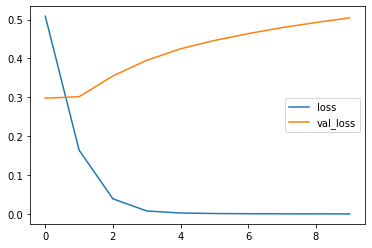

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history.get("loss"),label="loss")
plt.plot(history.epoch, history.history.get("val_loss"),label="val_loss")
plt.legend()
plt.show()

训练数据的准确率远高于测试数据的准确率，这是过拟合的问题，我们可以添加dropout,l2正则化解决过拟合

In [0]:
from tensorflow.keras import regularizers
model = keras.Sequential()
#输出为（None.300,50），意思是将这300个数据转化为300个50维的特征向量
model.add(layers.Embedding(10000,50,input_length=300,embeddings_regularizer=regularizers.l2(0.001)))
model.add(layers.GlobalAvgPool1D())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation= "relu",kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
y = model.add(layers.Dense(1,activation="sigmoid",kernel_regularizer=regularizers.l2(0.001)))
model.summary()

model.compile(optimizer = keras.optimizers.Adam(lr=0.001),
             loss = "binary_crossentropy",
             metrics = ["acc"]
             )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 50)           500000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               13056     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [0]:
history = model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


98/98 [==============================] - 3s 26ms/step - loss: 0.9417 - acc: 0.6739 - val_loss: 0.8925 - val_acc: 0.5110
Epoch 2/10
98/98 [==============================] - 2s 24ms/step - loss: 0.5110 - acc: 0.8672 - val_loss: 0.8516 - val_acc: 0.5066
Epoch 3/10
98/98 [==============================] - 2s 25ms/step - loss: 0.4200 - acc: 0.8984 - val_loss: 0.8033 - val_acc: 0.6794
Epoch 4/10
98/98 [==============================] - 3s 26ms/step - loss: 0.3850 - acc: 0.9087 - val_loss: 0.7196 - val_acc: 0.8363
Epoch 5/10
98/98 [==============================] - 2s 24ms/step - loss: 0.3500 - acc: 0.9196 - val_loss: 0.6267 - val_acc: 0.7583
Epoch 6/10
98/98 [==============================] - 2s 25ms/step - loss: 0.3360 - acc: 0.9216 - val_loss: 0.5075 - val_acc: 0.8535
Epoch 7/10
98/98 [==============================] - 2s 25ms/step - loss: 0.3158 - acc: 0.9280 - val_loss: 0.4609 - val_acc: 0.8490
Epoch 8/10
98/98 [==============================] - 2s 24ms/step - loss: 0.3039 - acc: 0.9316 

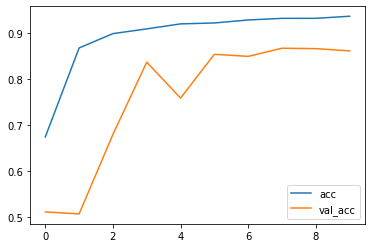

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history.get("acc"),label="acc")
plt.plot(history.epoch, history.history.get("val_acc"),label="val_acc")
plt.legend()
plt.show()

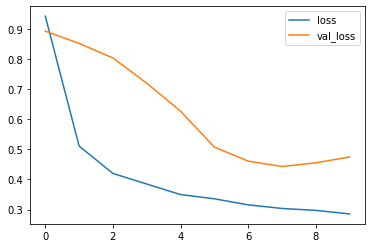

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history.get("loss"),label="loss")
plt.plot(history.epoch, history.history.get("val_loss"),label="val_loss")
plt.legend()
plt.show()

从图中我们可以知道加入dropout,l2正则换，批量归一化具有抑制过拟合的作用。